In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 100000000)
import warnings

In [2]:
df = pd.read_csv('prueba.csv')

In [6]:
# Initial Preprocessing pipeline

# Dealing with missing values
df.isnull().sum().sum()

var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
var_29     0
var_30     0
var_31     0
var_32     0
var_33     0
var_34     0
var_35     0
var_36     0
var_37     0
var_38     0
var_39     0
var_40     0
var_41     0
var_42     0
var_43     0
var_44     0
var_45     0
var_46     0
var_47     0
var_48     0
var_49     0
var_50     0
var_51     0
var_52     0
var_53     0
var_54     0
var_55     0
var_56     0
var_57     0
var_58     0
var_59     0
var_60     0
var_61     0
var_62     0
var_63     0
var_64     0
var_65     0
var_66     0
var_67     0
var_68     0
var_69     0
var_70     0
var_71     0
var_72     0
var_73     0
var_74     0
var_75     0
var_76     0
var_77     0

In [3]:
# Feature Selection with Wrapper method 

from sklearn.preprocessing import StandardScaler
# Initialize  Standarization 

sc = StandardScaler()

# Dive Train / Test Split
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [4]:
# Standarize Training data
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [5]:
# setup up a baseline

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train_sc, y_train)

print('Training accuracy:', np.mean(model.predict(X_train_sc) == y_train)*100)
print('Test accuracy:', np.mean(model.predict(X_test_sc) == y_test)*100)


Training accuracy: 100.0
Test accuracy: 51.33333333333333


In [6]:
# Signal of Overfitting

#Initial Feature selection with wrapper method
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(model, 
           k_features=30, # or (1, 13) and then select by hand 
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='accuracy',
           cv=5)


sfs1 = sfs1.fit(X_train_sc, y_train)

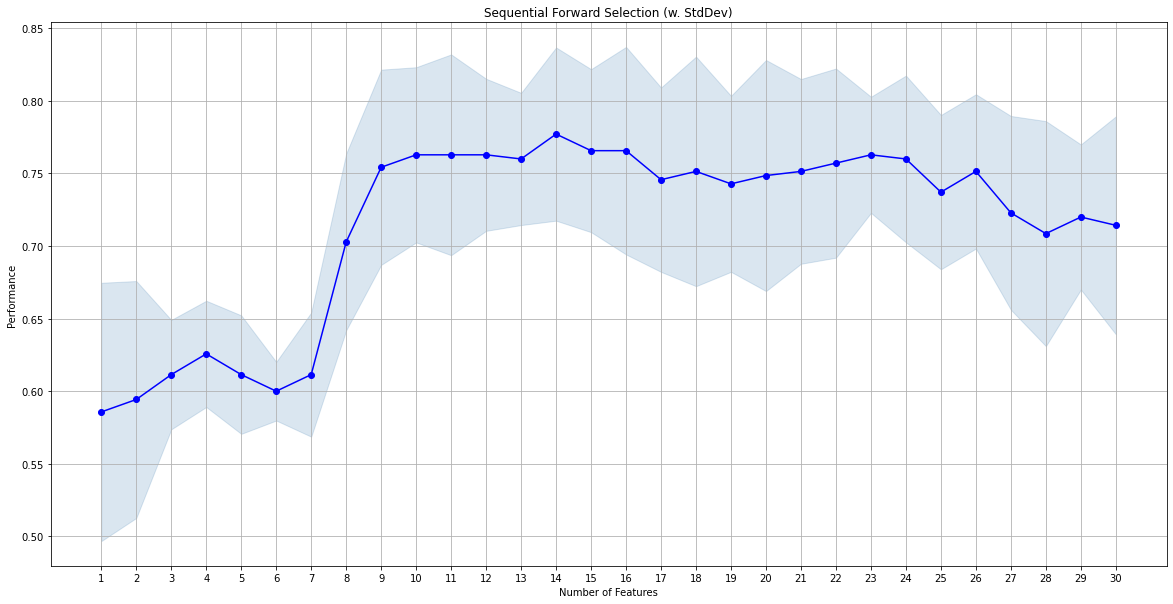

In [7]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
fig1 = plot_sfs(metric_dict, kind='std_dev',figsize=(20,10))

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()

plt.show()

In [12]:
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
df_metrics = pd.DataFrame.from_dict(metric_dict).T
df_metrics.tail(10)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
21,"(0, 2, 4, 11, 12, 17, 19, 27, 29, 36, 42, 44, ...","[0.8142857142857143, 0.6428571428571429, 0.728...",0.751429,"(0, 2, 4, 11, 12, 17, 19, 27, 29, 36, 42, 44, ...",0.081785,0.063632,0.031816
22,"(0, 2, 4, 11, 12, 17, 19, 27, 29, 36, 42, 44, ...","[0.8, 0.6714285714285714, 0.7142857142857143, ...",0.757143,"(0, 2, 4, 11, 12, 17, 19, 27, 29, 36, 42, 44, ...",0.08374,0.065153,0.032576
23,"(0, 2, 4, 11, 12, 17, 19, 27, 29, 36, 40, 42, ...","[0.6857142857142857, 0.7714285714285715, 0.785...",0.762857,"(0, 2, 4, 11, 12, 17, 19, 27, 29, 36, 40, 42, ...",0.051412,0.04,0.02
24,"(0, 2, 4, 11, 12, 17, 19, 27, 29, 36, 40, 42, ...","[0.7285714285714285, 0.7285714285714285, 0.714...",0.76,"(0, 2, 4, 11, 12, 17, 19, 27, 29, 36, 40, 42, ...",0.073812,0.057428,0.028714
25,"(0, 2, 4, 7, 11, 12, 17, 19, 27, 29, 36, 40, 4...","[0.7285714285714285, 0.6571428571428571, 0.714...",0.737143,"(0, 2, 4, 7, 11, 12, 17, 19, 27, 29, 36, 40, 4...",0.068308,0.053146,0.026573
26,"(0, 2, 4, 7, 11, 12, 17, 19, 27, 29, 36, 40, 4...","[0.6857142857142857, 0.7571428571428571, 0.785...",0.751429,"(0, 2, 4, 7, 11, 12, 17, 19, 27, 29, 36, 40, 4...",0.068308,0.053146,0.026573
27,"(0, 2, 4, 7, 9, 11, 12, 17, 19, 27, 29, 36, 40...","[0.6571428571428571, 0.6285714285714286, 0.785...",0.722857,"(0, 2, 4, 7, 9, 11, 12, 17, 19, 27, 29, 36, 40...",0.085808,0.066762,0.033381
28,"(0, 2, 4, 7, 9, 11, 12, 17, 19, 27, 29, 36, 40...","[0.6428571428571429, 0.6, 0.8142857142857143, ...",0.708571,"(0, 2, 4, 7, 9, 11, 12, 17, 19, 27, 29, 36, 40...",0.099626,0.077512,0.038756
29,"(0, 2, 4, 7, 9, 11, 12, 17, 19, 27, 29, 36, 40...","[0.6714285714285714, 0.6857142857142857, 0.8, ...",0.72,"(0, 2, 4, 7, 9, 11, 12, 17, 19, 27, 29, 36, 40...",0.064238,0.04998,0.02499
30,"(0, 2, 4, 7, 9, 11, 12, 17, 19, 27, 29, 36, 40...","[0.7142857142857143, 0.6, 0.8142857142857143, ...",0.714286,"(0, 2, 4, 7, 9, 11, 12, 17, 19, 27, 29, 36, 40...",0.096462,0.075051,0.037526


In [20]:

df.columns[:-1][list(sfs1.k_feature_idx_)]

Index(['var_1', 'var_3', 'var_5', 'var_8', 'var_10', 'var_12', 'var_13', 'var_18', 'var_20', 'var_28', 'var_30', 'var_37', 'var_41', 'var_43', 'var_45', 'var_50', 'var_51', 'var_53', 'var_60', 'var_66', 'var_69', 'var_74', 'var_80', 'var_81', 'var_84', 'var_85', 'var_87', 'var_92', 'var_93', 'var_96'], dtype='object')

In [21]:
# Reducing Dataset based on SFS

X_train_select = sfs1.transform(X_train_sc)
X_test_select = sfs1.transform(X_test_sc)

In [23]:
# Second iteration

model.fit(X_train_select, y_train)
print('Training accuracy:', np.mean(model.predict(X_train_select) == y_train)*100)
print('Test accuracy:', np.mean(model.predict(X_test_select) == y_test)*100)

Training accuracy: 100.0
Test accuracy: 53.333333333333336


In [ ]:
# Overfitting sign but increased in test accuracy

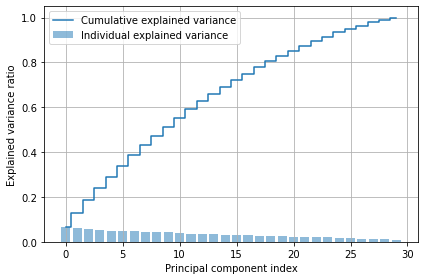

In [25]:
# Plot a PCA 

# Ho many components do we need 
from sklearn.decomposition import PCA
pca = PCA()

X_train_pca = pca.fit_transform(X_train_select)
X_test_pca = pca.fit_transform(X_test_select)

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.grid()
plt.show()

In [26]:
# Third iteration with PCA
# According to PCA we can explain 80% of the variance with 17 principal components
pca_17 = PCA(n_components=17)

X_train_pca_17 = pca_17.fit_transform(X_train_select)
X_test_pca_17 = pca_17.fit_transform(X_test_select)
model.fit(X_train_pca_17, y_train)
print('Training accuracy:', np.mean(model.predict(X_train_pca_17) == y_train)*100)
print('Test accuracy:', np.mean(model.predict(X_test_pca_17) == y_test)*100)

Training accuracy: 100.0
Test accuracy: 48.0


In [35]:
# Overfitting and still signs of overfitting

# Algorithm Selection Via Cross validation 


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import lightgbm as lgbm


# Initializing Classifiers
clf1 = LogisticRegression(random_state=1,)
clf2 = KNeighborsClassifier()
clf3 = lgbm.LGBMClassifier(random_state=1) #DecisionTreeClassifier(random_state=1)
clf4 = SVC(random_state=1)
clf5 = RandomForestClassifier(random_state=1)

parameter_grid1 = [{'penalty': ['l2'],
                'C': np.power(10., np.arange(-4, 4))}]

parameter_grid2 = [{'n_neighbors': list(range(1, 10)),
                'p': [1, 2]}]

parameter_grid3 = [ { 
                'learning_rate': [0.05],
                'n_estimators': [400,500,600,700,800,900,1000],
                'reg_alpha' : (1,1.2),
                'reg_lambda' : (1,1.2,1.4)
                }]

parameter_grid4 = [{'kernel': ['rbf'],
                'C': np.power(10., np.arange(-4, 4)),
                'gamma': np.power(10., np.arange(-5, 0))},
               {'kernel': ['linear'],
                'C': np.power(10., np.arange(-4, 4))}]

parameter_grid5 = [{'n_estimators': [10, 100, 500, 1000, 10000]}]

In [36]:
# Setting up multiple GridSearchCV objects, 1 for each algorithm
gridcvs = {}
inner_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)

for pgrid, est, name in zip((parameter_grid1,
                             parameter_grid2, 
                             parameter_grid3,
                            parameter_grid4, 
                             parameter_grid5),
                             
                            (clf1, clf2, clf3, clf4, clf5),
                            ('Logistic Regression', 'KNeighborsClassifier', 'LGBM', 'SCV', 'RandomForest')):
    gcv = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       scoring='accuracy',
                       n_jobs=1, 
                       cv=inner_cv,
                       verbose=0,
                       refit=True)
    gridcvs[name] = gcv

In [37]:
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


for name, gs_est in sorted(gridcvs.items()):
    nested_score = cross_val_score(gs_est, 
                                   X=X_train_select, 
                                   y=y_train, 
                                   cv=outer_cv,
                                   n_jobs=1) 
    print(f'{name:<7} | outer ACC {100*nested_score.mean():.2f}% +/- {100*nested_score.std():.2f}')

KNeighborsClassifier | outer ACC 66.00% +/- 4.28
LGBM    | outer ACC 64.57% +/- 8.05
Logistic Regression | outer ACC 46.29% +/- 4.30
RandomForest | outer ACC 54.57% +/- 6.22
SCV     | outer ACC 68.86% +/- 4.55


In [38]:
# Based on Nested  nested cross validation we see that SCV performs the best
# Now we select the best hp on the whole trainin set

gcv_model_select = GridSearchCV(estimator=clf4,
                                param_grid=parameter_grid4,
                                scoring='accuracy',
                                n_jobs=1,
                                cv=inner_cv,
                                verbose=1,
                                refit=True)

gcv_model_select.fit(X_train_select, y_train)
print('Best CV accuracy: %.2f%%' % (gcv_model_select.best_score_*100))
print('Best parameters:', gcv_model_select.best_params_)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
Best CV accuracy: 60.00%
Best parameters: {'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'}


In [40]:
from sklearn.metrics import accuracy_score
best_model = gcv_model_select.best_estimator_

train_acc = accuracy_score(y_true=y_train, y_pred=best_model.predict(X_train_select))
test_acc = accuracy_score(y_true=y_test, y_pred=best_model.predict(X_test_select))

print(f'Nested CV Accuracy {100 * gcv_model_select.best_score_:.2f}% (average over k-fold CV test folds)')
print(f'Best Parameters: {gcv_model_select.best_params_}')

print(f'Training Accuracy {100 * train_acc:.2f}%')
print(f'Test Accuracy {100 * test_acc:.2f}%')

Nested CV Accuracy 60.00% (average over k-fold CV test folds)
Best Parameters: {'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'}
Training Accuracy 98.29%
Test Accuracy 72.67%


In [51]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] #np.power(10., np.arange(-4, 4))
train_scores, test_scores = validation_curve(
                estimator=clf4, 
                X=X_train_select, 
                y=y_train, 
                param_name='C', 
                param_range = param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



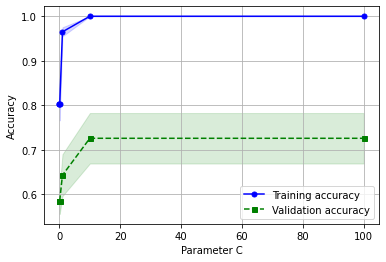

In [53]:
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
#plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
#plt.tight_layout()
# plt.savefig('figures/06_06.png', dpi=300)
plt.show()

In [50]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores =\
                learning_curve(estimator=clf4,
                               X=X_train_select,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


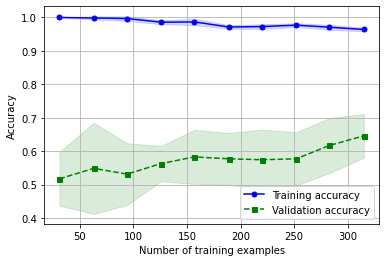

In [49]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
#plt.ylim([0.8, 1.03])
#plt.tight_layout()
# plt.savefig('figures/06_05.png', dpi=300)
plt.show()

The graph in the upper-right shows a model that suffers from high variance, which is indicated by the large gap between the training and cross-validation accuracy. To address this problem of overfitting, we can collect more training data, reduce the complexity of the model, or increase the regularization parameter, for example.
  [ 202 ]
 
Chapter 6
For unregularized models, it can also help to decrease the number of features via feature selection (Chapter 4, Building Good Training Datasets – Data Preprocessing)
or feature extraction (Chapter 5, Compressing Data via Dimensionality Reduction) to decrease the degree of overfitting. While collecting more training data usually tends to decrease the chance of overfitting, it may not always help, for example, if the training data is extremely noisy or the model is already very close to optimal.

In [ ]:
# Utilizaremos dos técnicas para mejorar el problema de overfitting. 
# Dado que el modelo ganador es un SVC. Vamos a incrementar el parametro de regularización
# Tambien vamos a reducir la complejidad del dataset aun más, quedando con solo los 5 atributos seleccionados por el método wrpaper SFS
# No vamos hacer Feature extraction con PCA por que hemos visto que la contrinución individual de los componentes es muy baja 


In [56]:
# Segunda iteración 


model_2it = SVC() #Como baseline empezamos con el SVC

model_2it.fit(X_train_sc, y_train)

print('Training accuracy:', np.mean(model_2it.predict(X_train_sc) == y_train)*100)
print('Test accuracy:', np.mean(model_2it.predict(X_test_sc) == y_test)*100)

Training accuracy: 99.42857142857143
Test accuracy: 54.666666666666664


In [58]:
sfs2 = SFS(model_2it, 
           k_features=5, # reducimos el dataset a 5 atributos
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='accuracy',
           cv=5)


sfs2 = sfs2.fit(X_train_sc, y_train)

In [59]:
# Reducing Dataset based on SFS

X_train_select_2it = sfs2.transform(X_train_sc)
X_test_select_2it = sfs2.transform(X_test_sc)

In [ ]:
# Dado que el GridSearch que hicimos ya nos dio los mejores parametros no es necesario hacer uno de nuevo.
# Solo vamos a incrementar el parametro C y utilizar los que nos dio GScv :
# Best parameters: {'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'}

In [65]:
model_2it_best = SVC(C=10000, gamma= 0.001, kernel='rbf') # Solo incrementamos parametro C y nos quedamos con los best de GridScv

model_2it_best.fit(X_train_select_2it, y_train)
train_acc_2it = accuracy_score(y_true=y_train, y_pred=model_2it_best.predict(X_train_select_2it))
test_acc_2it = accuracy_score(y_true=y_test, y_pred=model_2it_best.predict(X_test_select_2it))


print(f'Training Accuracy {100 * train_acc_2it:.2f}%')
print(f'Test Accuracy {100 * test_acc_2it:.2f}%')

Training Accuracy 64.29%
Test Accuracy 46.00%


In [66]:
# learning curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=model_2it_best,
                               X=X_train_select_2it,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

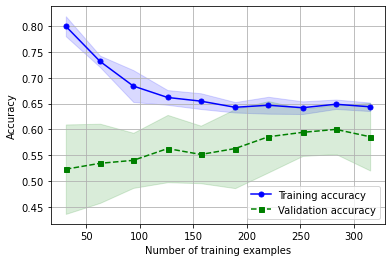

In [67]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
#plt.ylim([0.8, 1.03])
#plt.tight_layout()
# plt.savefig('figures/06_05.png', dpi=300)
plt.show()